# KNN
修正時間: 2020/6/27

## 模型介紹
KNN是透過機器學習去辨認目標物較接近資料庫中的何種資料。<br/>
會根據資料附近中training的資料點去判斷testing的目標物為何，方法則是依據在目標物附近的資料，若A佔據的比例較多，則機器就會將目標物便認為A；若是B的比例較多，目標物則會被辨認為B。
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/320px-KnnClassification.svg.png?1593349430867'>
<br/>
以圖例解釋:<br/>
在k=3的情況下，中間綠色的圓形會被視為是紅色的三角形<br/>
在k=5的情況下，中間綠色的圓形會被視為是藍色的正方形<br/>


## 程式碼
安裝所需套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import *
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 資料輸入
開啟檔案 <br/>
將兩筆檔案的columns' names修正為相同的columns' names

附註:
1. 需要把csv跟ipynb放到同一資料夾
2. 注意受試者是同一組

In [2]:
with open('013_b_1114_1_2_p1.csv', newline='') as csvfile1:
    data1 = pd.read_csv(csvfile1)
    data1 = data1.rename(columns = {'p1Cash':'Cash','p1Stock':'Stock','p1TotalAsset':'TotalAsset',
                                   'p1Decision':'Decision','p1ChechHistory':'CheckHistory'})
with open('014_b_1114_1_2_p2.csv', newline='') as csvfile2:
    data2 = pd.read_csv(csvfile2)
    data2 = data2.rename(columns = {'p2Cash':'Cash','p2Stock':'Stock','p2TotalAsset':'TotalAsset',
                                   'p2Decision':'Decision','p2ChechHistory':'CheckHistory'})

只有當回合資料<br/>
Cash為參與者持有的現金<br/>
StockPrice為當回合的股票價格<br/>
TotalAsset為參與者之總資產<br/>
opp_TotalAsset為對手之總資產<br/>
CheckHistory紀錄參與者是否觀看歷史紀錄<br/>

In [4]:
X = data1.loc[:,['Cash','StockPrice','TotalAsset']]
X['opp_TotalAsset'] = data2.loc[:,['TotalAsset']]
X['CheckHistory'] = pd.get_dummies(data1.loc[:,'CheckHistory'])['yes']

加入上回合的資料

In [5]:
X_1_101 = X[1:101]
X_1_101 = X_1_101.reset_index()
X_0_100 = X[0:100]
X_0_100 = X_0_100.rename(columns = {'Cash':'pre_Cash','StockPrice':'pre_StockPrice','TotalAsset':'pre_TotalAsset',
                                   'opp_TotalAsset':'pre_opp_TotalAsset','CheckHistory':'pre_CheckHistory'}, inplace = False)
X = pd.concat([X_1_101,X_0_100], axis=1)
X = X.drop(['index'], axis = 1)

加入delta_Price作為X的變項之一<br/>
再將X中所有的資料標準化

In [6]:
X['delta_Price'] = X['StockPrice']-X['pre_StockPrice']
X_data = X[0:99]
X = preprocessing.scale(X_data)

輸入data1的decision作為Y變項

In [7]:
Y_data = data1.loc[:,'Decision']
Y =Y_data.to_numpy()
Y = Y[1:100]

將X,Y的資料分為training data以及testing data(train:80%, test:20%)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 408)

建立knn模型<br/>
將k值從1加到21去檢視k值為何時表現較佳
* 尚未使用cross_validation

[0.6, 0.55, 0.5, 0.55, 0.55, 0.7, 0.65, 0.6, 0.65, 0.65, 0.65, 0.65, 0.65, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.65, 0.65, 0.65, 0.65, 0.6, 0.6, 0.55, 0.55, 0.6, 0.6, 0.6, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55]


Text(0, 0.5, 'Accuracy')

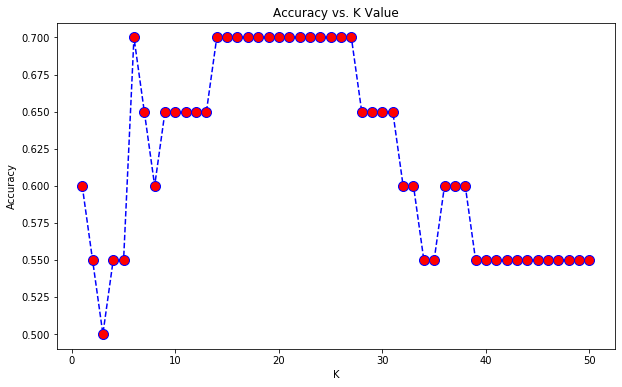

In [9]:
k=[]
acc = []
for i in range(1,51):
    knn = neighbors.KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    pred = knn.predict(X_test)
    k.append(i)
    acc.append(np.mean(pred==Y_test))
print(acc)
plt.figure(figsize=(10,6))
plt.plot(range(1,51),acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### 觀察結果
測試結果為k=7時，Accuracy已達到最高，無法再進行提升<br/>
因此列出k=7時的較詳細數據觀察結果

In [11]:
knn = neighbors.KNeighborsClassifier(7)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print(Y_test)
print(pred)

['no trade' 'no trade' 'no trade' 'no trade' 'no trade' 'no trade' 'sell'
 'no trade' 'sell' 'buy' 'sell' 'buy' 'buy' 'sell' 'no trade' 'buy'
 'no trade' 'no trade' 'sell' 'no trade']
['no trade' 'no trade' 'no trade' 'buy' 'no trade' 'no trade' 'sell'
 'no trade' 'no trade' 'no trade' 'sell' 'no trade' 'no trade' 'sell'
 'no trade' 'no trade' 'no trade' 'no trade' 'no trade' 'no trade']


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[ 0  4  0]
 [ 1 10  0]
 [ 0  2  3]]
              precision    recall  f1-score   support

         buy       0.00      0.00      0.00         4
    no trade       0.62      0.91      0.74        11
        sell       1.00      0.60      0.75         5

    accuracy                           0.65        20
   macro avg       0.54      0.50      0.50        20
weighted avg       0.59      0.65      0.59        20




Matrix         |(預測,實際)          |
:-------------:|:-------------------:|:--------------:
     (buy,buy) |   (buy,no trade)    | (buy,sell)
(no trade,buy) | (no trade,no trade) | (no trade,sell)
    (sell,buy) |   (sell,no trade)   | (sell,sell)

### 加入cross_validation再次進行模型的預測<br/>
將資料分為5組進行，再以scores_mean呈現5組的平均結果。

In [96]:
acc = []
for i in range(1,31):
    knn = neighbors.KNeighborsClassifier(i)
    scores = cross_val_score(knn,X,Y,cv=5,scoring='accuracy')
    print(scores)
    scores_mean = acc.append(scores.mean())

[0.31818182 0.6        0.68421053 0.36842105 0.52631579]
[0.31818182 0.7        0.68421053 0.36842105 0.05263158]
[0.36363636 0.65       0.68421053 0.21052632 0.52631579]
[0.36363636 0.5        0.63157895 0.31578947 0.47368421]
[0.54545455 0.5        0.57894737 0.42105263 0.52631579]
[0.36363636 0.5        0.52631579 0.10526316 0.52631579]
[0.36363636 0.5        0.57894737 0.26315789 0.52631579]
[0.40909091 0.5        0.57894737 0.15789474 0.52631579]
[0.40909091 0.5        0.57894737 0.26315789 0.52631579]
[0.54545455 0.5        0.52631579 0.26315789 0.52631579]
[0.54545455 0.5        0.52631579 0.47368421 0.52631579]
[0.54545455 0.5        0.52631579 0.26315789 0.52631579]
[0.36363636 0.5        0.52631579 0.47368421 0.52631579]
[0.40909091 0.5        0.52631579 0.52631579 0.52631579]
[0.40909091 0.55       0.52631579 0.52631579 0.52631579]
[0.54545455 0.5        0.52631579 0.52631579 0.52631579]
[0.36363636 0.5        0.52631579 0.52631579 0.52631579]
[0.59090909 0.5        0.526315

### 觀察結果2
以圖表呈現加入cross_validation後的結果

Text(0, 0.5, 'Accuracy')

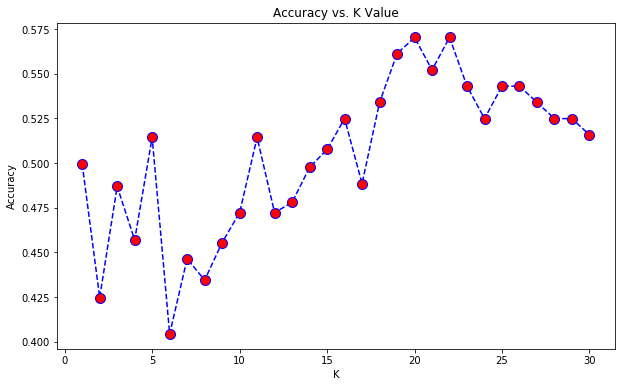

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31),acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')